## KNN Confusion Matrix

|   |Predicted Positive | Predicted Negative |   
|---|---|---|
|   |   |   |   
|Actual Positive | TP = Correct!  | **FN**  |  
|Actual Negative  | **FP**  | TN = Correct!  | 

- **True Positives**: A positive class observation (1) is correctly classified as positive by the model.
- **False Positive**: A negative class observation (0) is incorrectly classified as positive.
- **True Negative**: A negative class observation is correctly classified as negative.
- **False Negative**: A positive class observation is incorrectly classified as negative.


In [8]:
import numpy as np
import pandas as pd

# Load gridsearch
from sklearn import grid_search
from sklearn.cross_validation import train_test_split

# Load graph packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline



#### 1.1 Load the Spam dataset

In [3]:
## Load the Spam Data set
path_to_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/spam/spam_words_wide.csv'
spam = pd.read_csv(path_to_file)

In [4]:
spam.head()

,is_spam,getzed,86021,babies,sunoco,ultimately,thk,voted,spatula,fiend,...,itna,borin,thoughts,iccha,videochat,freefone,pist,reformat,strict,69698
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
spam.shape

#### 1.2 Find the Spam Baseline / Mean

In [5]:
## use value counts on is_spam
print spam.is_spam.value_counts()
print "\n"

## print the mean of is_spam
print spam.is_spam.mean()

0    4825
1     747
Name: is_spam, dtype: int64


0.134063173008


#### 2.1 Set up a KNN, with a test size of 0.3, a cv of 5 folds

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [10]:
# define target = is_spam
target = 'is_spam'

# define predictors "all the columns except target" and called it cols
cols = [c for c in spam.columns if c != target]

# define x and y
x = spam[cols]
y = spam[target]

# print y and x shapes
print y.shape, x.shape 

(5572,) (5572, 1000)


In [11]:
## Train split the data, test_size = 0.3
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.3)

print y_train.shape, X_train.shape
print y_test.shape, X_test.shape

(3900,) (3900, 1000)
(1672,) (1672, 1000)


In [16]:
### Intialize KNN 
## http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier()

# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors':  range(1,10,2), 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2]
}

# Intialize GridSearchCV
clf = grid_search.GridSearchCV(knn, search_parameters, cv=5, verbose=1, n_jobs=-1)


In [18]:
## Fit data on train
clf.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [19]:
print "Best Estimator:", clf.best_estimator_.n_neighbors
print "Best Params:", clf.best_params_
print "Best Score:", clf.best_score_

Best Estimator: 7
Best Params: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 1}
Best Score: 0.938205128205


In [20]:
## Predict the values call them y_pred (y predicted probabilities) and print 5 rows
y_pred = clf.predict(X_test)
print y_pred[0:5]

[0 0 0 0 0]


#### 3.1 Build a Confusion Matrix

In [21]:
## Manually Calculate
# Build a confusion Matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1441,5,1446
1,97,129,226
All,1538,134,1672


In [22]:
# Load Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

confusion = pd.DataFrame(confmat, index=['is_not_spam_email', 'is_spam_email'],
                         columns=['predicted_is_not_spam_email','predicted_is_spam_email'])

print(confusion)

                   predicted_is_not_spam_email  predicted_is_spam_email
is_not_spam_email                         1441                        5
is_spam_email                               97                      129


#### 3.2 Calculate true positives, false positives, true negatives, and false negatives from the confusion matrix


In [23]:
TP = confusion.ix['is_not_spam_email', 'predicted_is_not_spam_email']  

FP = confusion.ix['is_spam_email', 'predicted_is_not_spam_email']

TN = confusion.ix['is_spam_email', 'predicted_is_spam_email']

FN = confusion.ix['is_not_spam_email', 'predicted_is_spam_email']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 1441), ('False Positives', 97), ('True Negatives', 129), ('False Negatives', 5)]


#### 3.3 Calculate the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)

#### 3.4 Show that the accuracy is equivalent to: True Positives + True Negatives / Total


In [24]:
print((TP + TN) / float(len(y_test)))

0.938995215311


#### 3.5 Misclassification Rate (Error Rate)

In [25]:
print ((FP + FN))/ float(len(y_test))

0.061004784689


#### 3.6 Precision


In [26]:
pcs = precision_score(y_test, y_pred)
print pcs

0.962686567164


#### 3.7 Recall 

In [27]:
rcs = recall_score(y_test, y_pred)
print rcs

0.570796460177


#### 3.5 Create a classification report


In [ ]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep 

#### Here is what the classification report is telling us
Each of the columns indicate an important metric for evaluating classification model performance.

|   |   |
|---|---|
|**precision** | Ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**recall**    | is the ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations.  0 means the classifier predicted all observations of the current class incorrectly.|
|**f1-score** | is the harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. <br><br>`F1-Score = 2 * (Precision * Recall) / (Precision + Recall)` <br><br>_The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once._ |
|**support** | is simply the number of observations of the labelled class.|

In [28]:
## David
import matplotlib as plt
import seaborn as sns

%matplotlib inline
%pylab inline

def plot_confusion_matrix(cm, title='Confusion matrix', target_names=False, figsize=(5, 5), cmap=plt.cm.Blues):
    figure(figsize=figsize)
    # confmat == the confusion_matrix result object (is an array)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


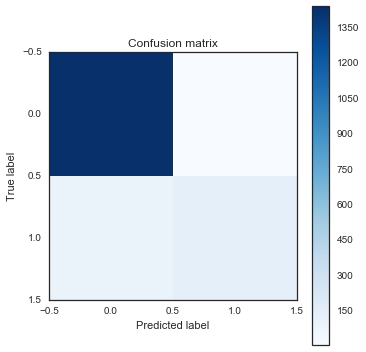

In [29]:
plot_confusion_matrix(confmat)

In [30]:
## Precision
# 0 vs. 1
print(float(TP) / (TP + FP))

# 1 vs. 0
print(float(TN) / (TN + FN))

0.936931079324
0.962686567164


In [31]:
## How many class predictions did we "recall" correctly?
# 0 vs. 1
print(float(TP) / (TP + FN))

# 1 vs. 0
print(float(TN) / (TN + FP))

0.996542185339
0.570796460177


#### F1-score is equivalent to: 2 * ( (Precision Recall) / (Precision + Recall) )

In [32]:
# 0 vs. 1
pos_precision = float(TP) / (TP + FP)
pos_recall = float(TP) / (TP + FN)
print(2. * (pos_precision * pos_recall) / (pos_precision + pos_recall))

# 1 vs. 0
neg_precision = float(TN) / (TN + FN)
neg_recall = float(TN) / (TN + FP)
print(2. * (neg_precision * neg_recall) / (neg_precision + neg_recall))

0.96581769437
0.716666666667


### Remeber the Wisconsin Breast Cancer Dataset?

In [ ]:
# 0 means benign, 1 means malignant
target    = [0, 1, 1, 0, 1, 0, 1, 1, 1]

#Prediction Results from a Machine Leaning Model
predicted = [0, 0, 1, 1, 1, 0, 1, 1, 1]

# Label the Classifiers
target_names = ['benign', 'malignant']

#Print Classification Report
print (classification_report(target, predicted, target_names=target_names))

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [ ]:
def test(x=10):

    target = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    predicted = ([1] * x) + ([0] * (30-x))
    
    print("Target   ", target)
    print("Predicted", predicted)
    
    # Label the Classifiers
    target_names = ['benign', 'malignant']

    #Print Classification Report
    print(classification_report(target, predicted, target_names=target_names))
    
    return


In [ ]:
interact(test, x=widgets.IntSlider(min=1, max=20, value=10));